# (08) Align (within) -- results

**Motivation**: Alignment scores within model classes. Load and plot results for lasso. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# Code path
sys.path.insert(0, '/home/hadi/Documents/MTMST/code')
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
def _load(seeds: dict, mod: str, beta: float):
    df = []
    for s1, s2 in itertools.combinations(seeds, 2):
        for src, tgt in [(s1, s2), (s2, s1)]:
            d = f'lasso-{mod}_beta-{beta}_src-{src}_tgt-{tgt}.npy'
            try:
                d = np.load(
                    file=pjoin(path, d),
                    allow_pickle=True,
                ).item()
            except FileNotFoundError:
                continue
            for k in ['a', 'r2']:
                v = d[k] # [ids],
                df.append({
                    'model': [mod] * len(v),
                    'beta': [beta] * len(v),
                    'cond': [d['cond']] * len(v),
                    'measure': [k] * len(v),
                    'value': v, 
                })
    df = pd.DataFrame(merge_dicts(df))
    return df

In [3]:
_PROPS = {
    'meanprops': {
        'marker': 'o',
        'markerfacecolor': 'white',
        'markeredgecolor': 'k',
        'markersize': 3,
        'alpha': 1.0},
    'flierprops': {
        'marker': 'o',
        'markersize': 1.5,
        'alpha': 0.3,
        'zorder': 1},
    'showfliers': True,
    'showmeans': True,
    'dodge': True,
    'width': 0.7,
}

## Setup

In [4]:
fig_dir = pjoin(fig_base_dir, 'rebuttal_aug')
print(fig_dir)

path = pjoin(tmp_dir, 'alignment_rebuttal')
pal_model, pal_cat = get_palette()

/home/hadi/Dropbox/git/jb-MTMST/figs/rebuttal_aug

## Plot

In [5]:
df = pd.concat([
    _load(range(4), 'VAE', 1.0),
    _load(range(4), 'cNVAE', 1.0),
])

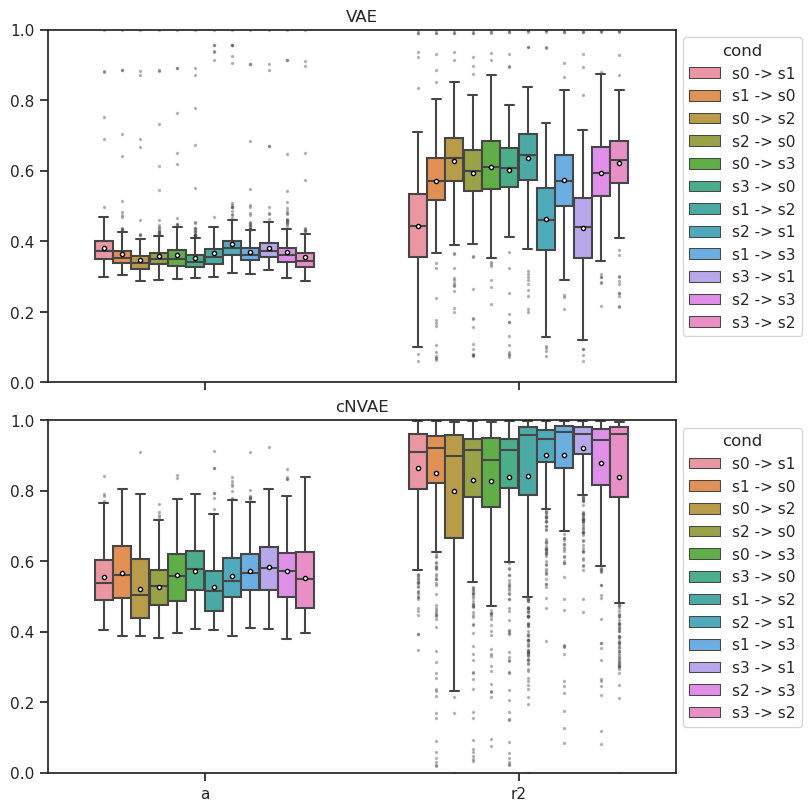

In [9]:
fig, axes = create_figure(2, 1, (8, 8), 'all', 'all', 'constrained')
for i, mod in enumerate(df['model'].unique()):
    sns.boxplot(
        data=df.loc[df['model'] == mod],
        x='measure',
        hue='cond',
        y='value',
        ax=axes[i],
        **_PROPS,
    )
    move_legend(axes[i], (1, 1))
    axes[i].set(
        title=mod,
        xlabel='',
        ylabel='',
    )
axes[-1].set_ylim(0, 1)
plt.show()

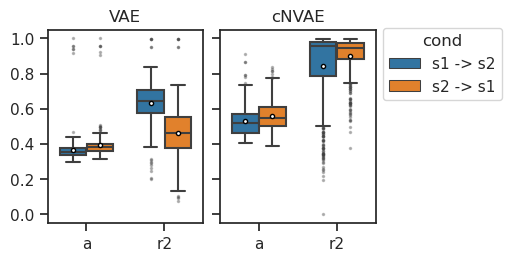

In [18]:
_df = df.loc[df['cond'].isin(['s1 -> s2', 's2 -> s1'])]
fig, axes = create_figure(1, 2, (5, 2.5), 'all', 'all', 'constrained')
for i, mod in enumerate(df['model'].unique()):
    sns.boxplot(
        data=_df.loc[_df['model'] == mod],
        x='measure',
        hue='cond',
        y='value',
        ax=axes[i],
        **_PROPS,
    )
    move_legend(
        axes[i],
        None if i == 0 else (1, 1.05),
    )
    axes[i].set(
        title=mod,
        xlabel='',
        ylabel='',
    )
plt.show()

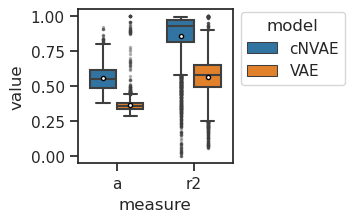

In [28]:
fig, ax = create_figure(1, 1, (2, 2))

sns.boxplot(
    data=df,
    x='measure',
    y='value',
    hue='model',
    hue_order=['cNVAE', 'VAE'],
    ax=ax,
    **_PROPS,
)
move_legend(ax, (1., 1.03))
plt.show()